In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')  

# a) Import data

data = "D:\kolya\Data Science Methedology\python\project\walmart-sales-dataset-of-45stores.csv"
df = pd.read_csv(data) 

# b) Display data (first 5 Rows)

df.head() 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


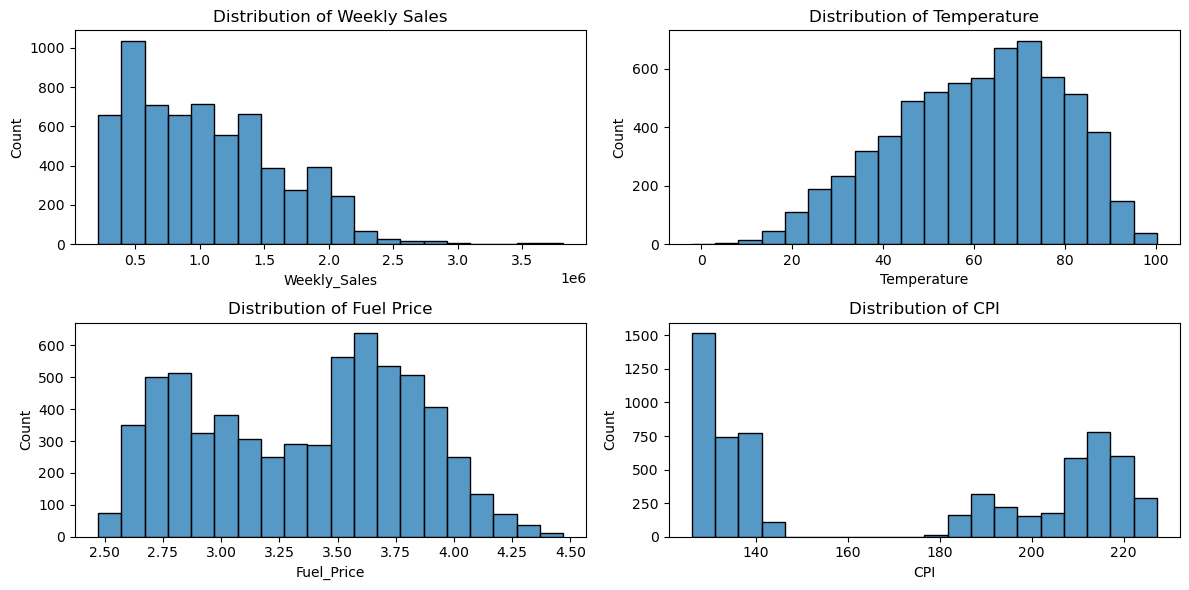

In [18]:
# c) Visualize quantitative variables distributions

#This specifies the size of the figure in inches
# It's a tuple where the first value represents the width and the second value represents the height.
#In this case, the figure will be 12 inches wide and 6 inches tall.
plt.figure(figsize=(12, 6)) 


# Histogram of Weekly Sales

plt.subplot(2, 2, 1)
sns.histplot(df["Weekly_Sales"], bins=20)
plt.title("Distribution of Weekly Sales")

# Histogram of Temperature

plt.subplot(2, 2, 2)
sns.histplot(df["Temperature"], bins=20)
plt.title("Distribution of Temperature")

# Histogram of Fuel Price

plt.subplot(2, 2, 3)
sns.histplot(df["Fuel_Price"], bins=20)
plt.title("Distribution of Fuel Price")

# Histogram of CPI

plt.subplot(2, 2, 4)
sns.histplot(df["CPI"], bins=20)
plt.title("Distribution of CPI")

plt.tight_layout()

In [19]:
# d) perform data cleaning

# Check for missing values
print("Number of missing values:")
print(df.isnull().sum())


# Check for duplicated values
print("Number of duplicated values:")
print(df.duplicated().sum())


Number of missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Number of duplicated values:
0


In [20]:
# a) Which store has maximum sales?

store_max_sales = df.groupby("Store")["Weekly_Sales"].sum().idxmax()
print("Store with maximum sales:", store_max_sales)


Store with maximum sales: 20


In [21]:
# b) Which store has maximum standard deviation?

store_max_std = df.groupby("Store")["Weekly_Sales"].std().idxmax()
print("Store with maximum standard deviation:", store_max_std)


Store with maximum standard deviation: 14


In [22]:
# c) Holidays with higher sales than mean sales in non-holiday season

mean_non_holiday_sales = df[df["Holiday_Flag"] == 0]["Weekly_Sales"].mean()
holidays_higher_than_mean = df[
    (df["Holiday_Flag"] == 1) & (df["Weekly_Sales"] > mean_non_holiday_sales)
]["Date"].unique()
print("Holidays with higher sales than mean non-holiday sales:")
print(holidays_higher_than_mean)


Holidays with higher sales than mean non-holiday sales:
['12-02-2010' '10-09-2010' '26-11-2010' '31-12-2010' '11-02-2011'
 '09-09-2011' '25-11-2011' '30-12-2011' '10-02-2012' '07-09-2012']


In [23]:
# d) Monthly and semester view of sales
# Convert date column to datetime with correct format

df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Monthly sales

monthly_sales = df.groupby(["Year", "Month"])["Weekly_Sales"].sum()
print("\nMonthly Sales:")
print(monthly_sales)


# Semester view of sales

semester_sales = df.groupby(
    ["Year", pd.cut(df["Month"], bins=4, labels=["Semester 1", "Semester 2" , "Semester 3" , "Semester 4"])]
)["Weekly_Sales"].sum()
print("\nSemester View of Sales:")
print(semester_sales)



Monthly Sales:
Year  Month
2010  2        1.903330e+08
      3        1.819198e+08
      4        2.314124e+08
      5        1.867109e+08
      6        1.922462e+08
      7        2.325801e+08
      8        1.876401e+08
      9        1.772679e+08
      10       2.171618e+08
      11       2.028534e+08
      12       2.887605e+08
2011  1        1.637040e+08
      2        1.863313e+08
      3        1.793564e+08
      4        2.265265e+08
      5        1.816482e+08
      6        1.897734e+08
      7        2.299114e+08
      8        1.885993e+08
      9        2.208477e+08
      10       1.832613e+08
      11       2.101624e+08
      12       2.880781e+08
2012  1        1.688945e+08
      2        1.920636e+08
      3        2.315097e+08
      4        1.889209e+08
      5        1.887665e+08
      6        2.406103e+08
      7        1.875095e+08
      8        2.368508e+08
      9        1.806455e+08
      10       1.843617e+08
Name: Weekly_Sales, dtype: float64

Semester Vie

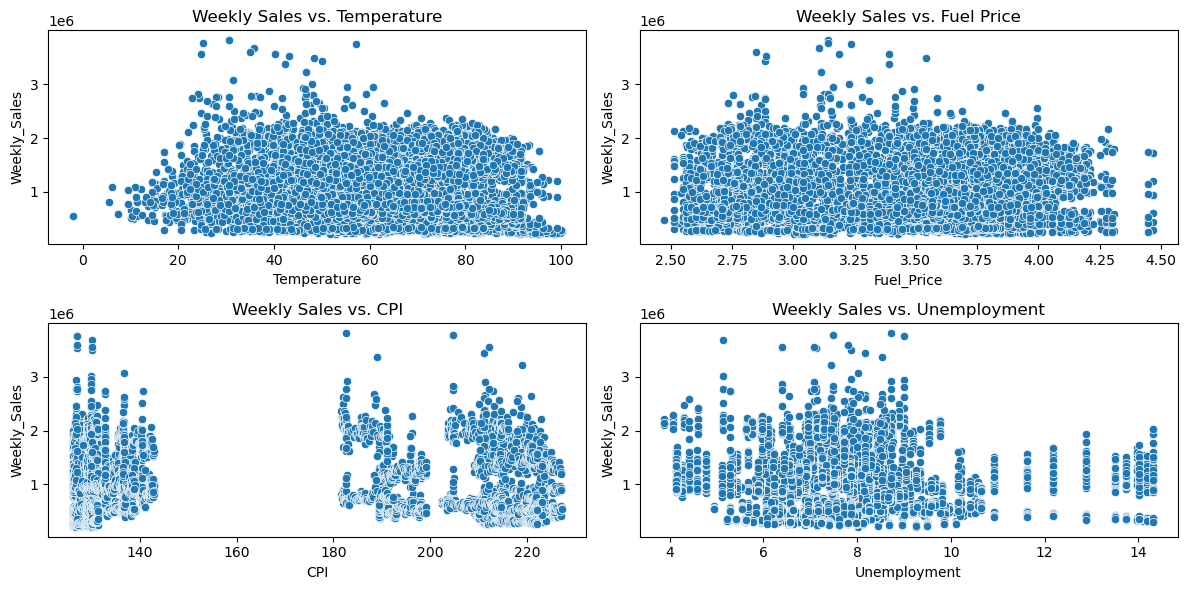

In [24]:
# e) Relations between weekly sales vs. other numeric features

plt.figure(figsize=(12, 6))

# Weekly sales vs. Temperature

plt.subplot(2, 2, 1)
sns.scatterplot(x="Temperature", y="Weekly_Sales", data=df)
plt.title("Weekly Sales vs. Temperature")

# Weekly sales vs. Fuel Price

plt.subplot(2, 2, 2)
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=df)
plt.title("Weekly Sales vs. Fuel Price")

# Weekly sales vs. CPI

plt.subplot(2, 2, 3)
sns.scatterplot(x="CPI", y="Weekly_Sales", data=df)
plt.title("Weekly Sales vs. CPI")

# Weekly sales vs. Unemployment

plt.subplot(2, 2, 4)
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=df)
plt.title("Weekly Sales vs. Unemployment")

plt.tight_layout()
